# Advanced Web Scraping Lab

In this lab you will first learn the following code snippet which is a simple web spider class that allows you to scrape paginated webpages. Read the code, run it, and make sure you understand how it work. In the challenges of this lab, we will guide you in building up this class so that eventually you will have a more robus web spider that you can further work on in the Web Scraping Project.

In [1]:
import requests
from bs4 import BeautifulSoup as bs
from IPython.display import IFrame, HTML, Image

class IronhackSpider:
    """
    This is the constructor class to which you can pass a bunch of parameters. 
    These parameters are stored to the class instance variables so that the
    class functions can access them later.
    
    url_pattern: the regex pattern of the web urls to scape
    pages_to_scrape: how many pages to scrape
    sleep_interval: the time interval in seconds to delay between requests. If <0, requests will not be delayed.
    content_parser: a function reference that will extract the intended info from the scraped content.
    """
    def __init__(self, url_pattern, pages_to_scrape=10, sleep_interval=-1, content_parser=None):
        self.url_pattern = url_pattern
        self.pages_to_scrape = pages_to_scrape
        self.sleep_interval = sleep_interval
        self.content_parser = content_parser
    
    """
    Scrape the content of a single url.
    """
    def scrape_url(self, url):
        
        response = requests.get(url)
        result = self.content_parser(response.content)
        self.output_results(result)
        
    
    """
    Export the scraped content. Right now it simply print out the results.
    But in the future you can export the results into a text file or database.
    """
    def output_results(self, r):
        print(r)
    
    """
    After the class is instantiated, call this function to start the scraping jobs.
    This function uses a FOR loop to call `scrape_url()` for each url to scrape.
    """
    def kickstart(self):
        for i in range(1, self.pages_to_scrape+1):
            self.scrape_url(self.url_pattern % i)      #The "%" it is to interpolate/substitute the number in the string


URL_PATTERN = 'http://quotes.toscrape.com/page/%s/' # regex pattern for the urls to scrape
PAGES_TO_SCRAPE = 1 # how many webpages to scrapge

"""
This is a custom parser function you will complete in the challenge.
Right now it simply returns the string passed to it. But in this lab
you will complete this function so that it extracts the quotes.
This function will be passed to the IronhackSpider class.
"""
def quotes_parser(content):
    
    soup = bs(content, 'html')
    quotes = [x.get_text() for x in soup.find_all('span', {'class':'text'})]
    
    return quotes

# Instantiate the IronhackSpider class
my_spider = IronhackSpider(URL_PATTERN, PAGES_TO_SCRAPE, content_parser=quotes_parser)

# Start scraping jobs
my_spider.kickstart()

['“The world as we have created it is a process of our thinking. It cannot be changed without changing our thinking.”', '“It is our choices, Harry, that show what we truly are, far more than our abilities.”', '“There are only two ways to live your life. One is as though nothing is a miracle. The other is as though everything is a miracle.”', '“The person, be it gentleman or lady, who has not pleasure in a good novel, must be intolerably stupid.”', "“Imperfection is beauty, madness is genius and it's better to be absolutely ridiculous than absolutely boring.”", '“Try not to become a man of success. Rather become a man of value.”', '“It is better to be hated for what you are than to be loved for what you are not.”', "“I have not failed. I've just found 10,000 ways that won't work.”", "“A woman is like a tea bag; you never know how strong it is until it's in hot water.”", '“A day without sunshine is like, you know, night.”']


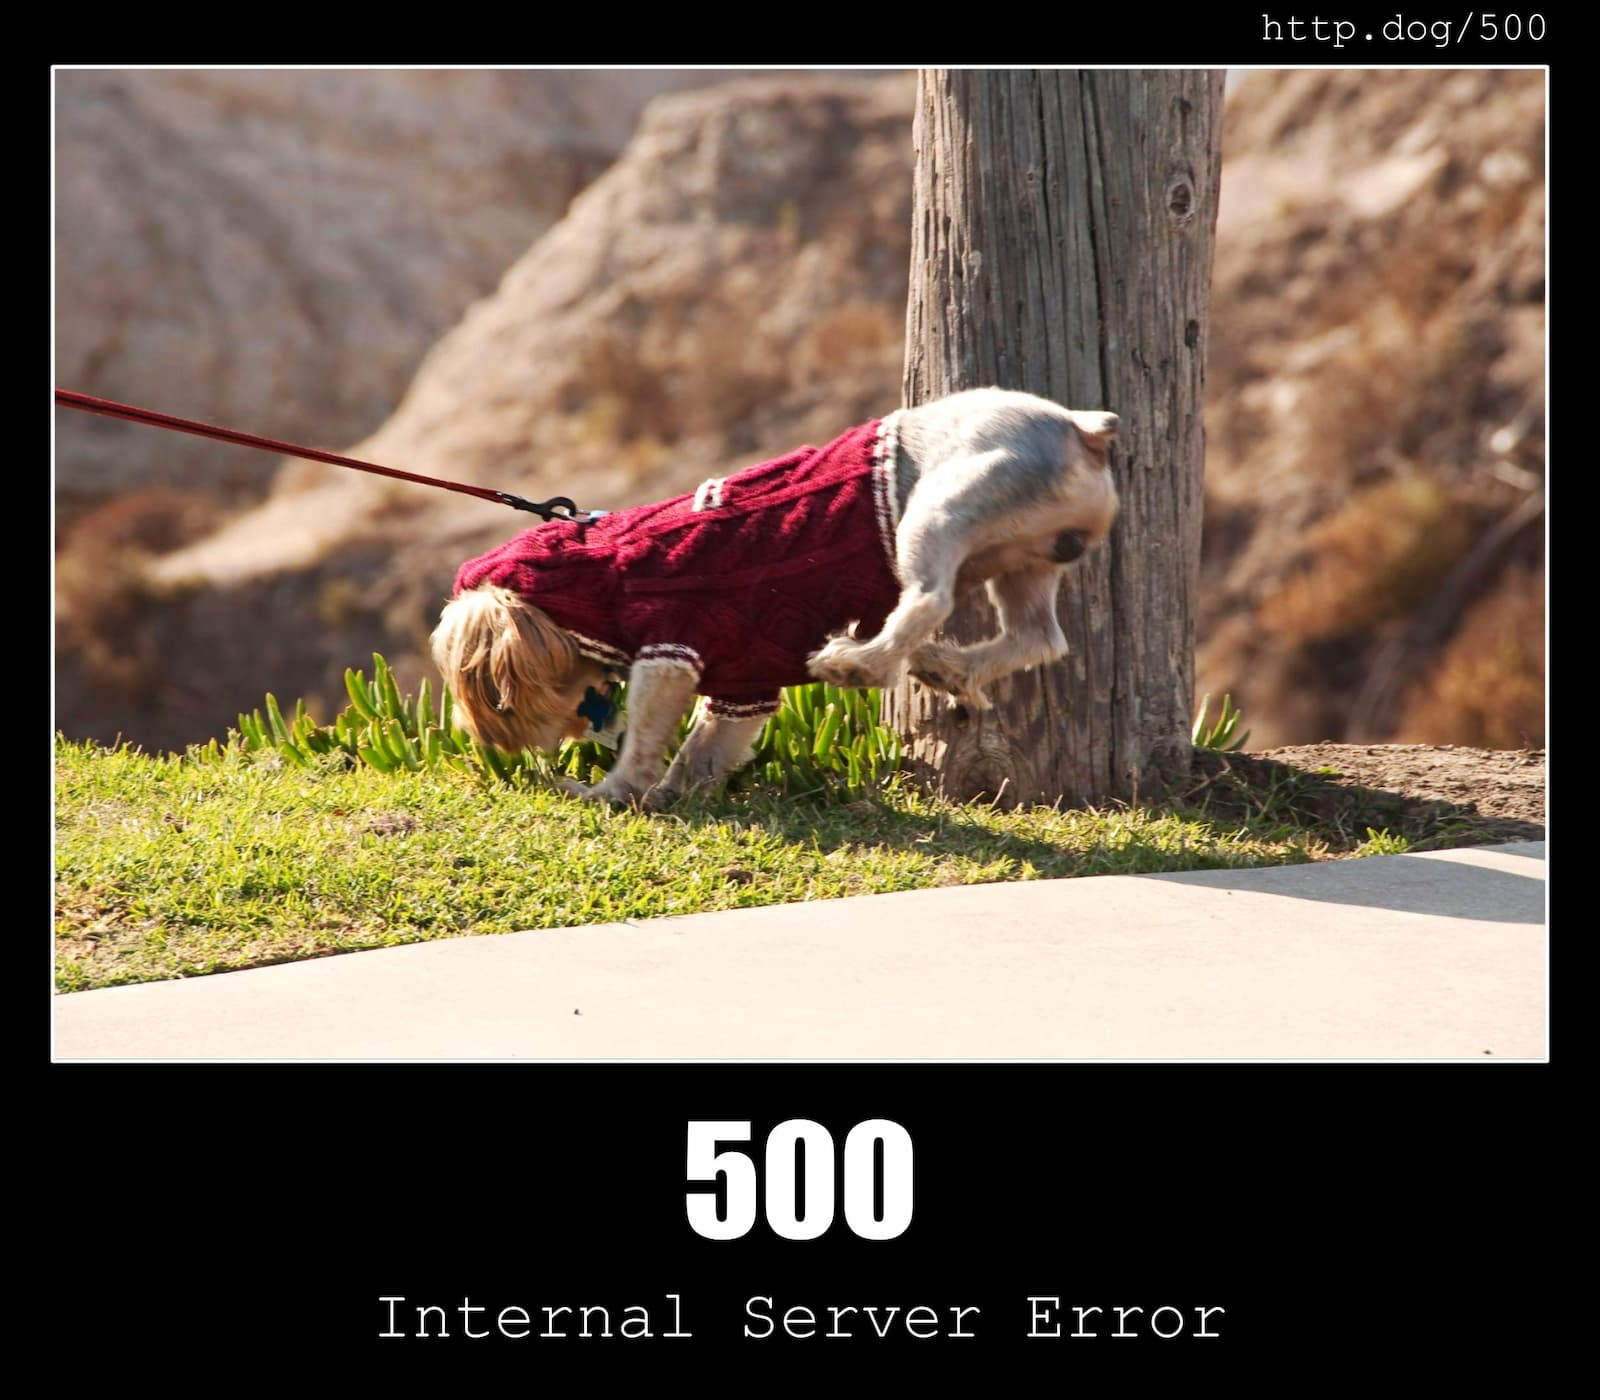

In [71]:
url = 'https://quotes.toscrape.com/page/s/'

def scrape_url(url):

    response = requests.get(url)
    
    if response.status_code == 200:
        result = quotes_parser(response.content)
        return(result)

    elif response.status_code>1000:
        
        response_img = response.status_code
        url_image= (f"https://http.dog/{response_img}.jpg")
        image_error = Image(url_image)
        display(image_error)
        
    else:
        print('Something unexpected happened');




scrape_url(url)

## Challenge 1 - Custom Parser Function

In this challenge, complete the custom `quotes_parser()` function so that the returned result contains the quote string instead of the whole html page content.

In the cell below, write your updated `quotes_parser()` function and kickstart the spider. Make sure the results being printed contain a list of quote strings extracted from the html content.

In [59]:
def quotes_parser(content):
    
    soup = bs(content, 'html')
    quotes = [x.get_text() for x in soup.find_all('span', {'class':'text'})]
    
    return quotes

url = 'https://quotes.toscrape.com/page/1/'
response = requests.get(url)
result = quotes_parser(response.content)
result[0]

'“The world as we have created it is a process of our thinking. It cannot be changed without changing our thinking.”'

## Challenge 2 - Error Handling

In `IronhackSpider.scrape_url()`, catch any error that might occur when you make requests to scrape the webpage. This includes checking the response status code and catching http request errors such as timeout, SSL, and too many redirects.

In the cell below, place your entire code including the updated `IronhackSpdier` class and the code to kickstart the spider.

In [76]:
import requests
from bs4 import BeautifulSoup as bs
from IPython.display import IFrame, HTML, Image

class IronhackSpider:
    """
    This is the constructor class to which you can pass a bunch of parameters. 
    These parameters are stored to the class instance variables so that the
    class functions can access them later.
    
    url_pattern: the regex pattern of the web urls to scape
    pages_to_scrape: how many pages to scrape
    sleep_interval: the time interval in seconds to delay between requests. If <0, requests will not be delayed.
    content_parser: a function reference that will extract the intended info from the scraped content.
    """
    def __init__(self, url_pattern, pages_to_scrape=10, sleep_interval=-1, content_parser=None):
        self.url_pattern = url_pattern
        self.pages_to_scrape = pages_to_scrape
        self.sleep_interval = sleep_interval
        self.content_parser = content_parser
    
    """
    Scrape the content of a single url.
    """
    
    
    # >200 está bien
    #200-400 es culpa del cliente
    #<400 es culpa del servidor
    def scrape_url(self, url):
        
        response = requests.get(url)
        if response.status_code <= 200:   
            
            result = self.content_parser(response.content)
            self.output_results(result)

        elif response.status_code>1000:

            response_img = response.status_code
            url_image= (f"https://http.dog/{response_img}.jpg")
            image_error = Image(url_image)
            display(image_error)

        else:
            print('Something unexpected happened');
    
    """
    Export the scraped content. Right now it simply print out the results.
    But in the future you can export the results into a text file or database.
    """
    def output_results(self, r):
        print(r)
    
    """
    After the class is instantiated, call this function to start the scraping jobs.
    This function uses a FOR loop to call `scrape_url()` for each url to scrape.
    """
    def kickstart(self):
        for i in range(1, self.pages_to_scrape+1):
            self.scrape_url(self.url_pattern % i)      #The "%" it is to interpolate/substitute the number in the string


URL_PATTERN = 'http://quotes.toscrape.com/page/%s/' # regex pattern for the urls to scrape
PAGES_TO_SCRAPE = 1 # how many webpages to scrapge

"""
This is a custom parser function you will complete in the challenge.
Right now it simply returns the string passed to it. But in this lab
you will complete this function so that it extracts the quotes.
This function will be passed to the IronhackSpider class.
"""
def quotes_parser(content):
    
    soup = bs(content, 'html')
    quotes = [x.get_text() for x in soup.find_all('span', {'class':'text'})]
    
    return quotes

# Instantiate the IronhackSpider class
my_spider = IronhackSpider(URL_PATTERN, PAGES_TO_SCRAPE, content_parser=quotes_parser)

# Start scraping jobs
my_spider.kickstart()

['“The world as we have created it is a process of our thinking. It cannot be changed without changing our thinking.”', '“It is our choices, Harry, that show what we truly are, far more than our abilities.”', '“There are only two ways to live your life. One is as though nothing is a miracle. The other is as though everything is a miracle.”', '“The person, be it gentleman or lady, who has not pleasure in a good novel, must be intolerably stupid.”', "“Imperfection is beauty, madness is genius and it's better to be absolutely ridiculous than absolutely boring.”", '“Try not to become a man of success. Rather become a man of value.”', '“It is better to be hated for what you are than to be loved for what you are not.”', "“I have not failed. I've just found 10,000 ways that won't work.”", "“A woman is like a tea bag; you never know how strong it is until it's in hot water.”", '“A day without sunshine is like, you know, night.”']


In [40]:
#from IPython.display import IFrame, HTML, Image


#response = 200
#url = (f"https://http.dog/{response}.jpg")
#Image(url)


# Challenge 3 - Sleep Interval

In `IronhackSpider.kickstart()`, implement `sleep_interval`. You will check if `self.sleep_interval` is larger than 0. If so, tell the FOR loop to sleep the given amount of time before making the next request.

In the cell below, place your entire code including the updated `IronhackSpdier` class and the code to kickstart the spider.

In [79]:
import requests
import time
from bs4 import BeautifulSoup as bs
from IPython.display import IFrame, HTML, Image


class IronhackSpider:
    """
    This is the constructor class to which you can pass a bunch of parameters. 
    These parameters are stored to the class instance variables so that the
    class functions can access them later.
    
    url_pattern: the regex pattern of the web urls to scape
    pages_to_scrape: how many pages to scrape
    sleep_interval: the time interval in seconds to delay between requests. If <0, requests will not be delayed.
    content_parser: a function reference that will extract the intended info from the scraped content.
    """
    def __init__(self, url_pattern, pages_to_scrape=10, sleep_interval=0, content_parser=None):
        self.url_pattern = url_pattern
        self.pages_to_scrape = pages_to_scrape
        self.sleep_interval = sleep_interval
        self.content_parser = content_parser
    
    """
    Scrape the content of a single url.
    """
    def scrape_url(self, url):
        
        response = requests.get(url)
        if response.status_code == 200:
            
            result = self.content_parser(response.content)
            self.output_results(result)

        elif response.status_code>1000:

            response_img = response.status_code
            url_image= (f"https://http.dog/{response_img}.jpg")
            image_error = Image(url_image)
            display(image_error)

        else:
            print('Something unexpected happened');
    
    """
    Export the scraped content. Right now it simply print out the results.
    But in the future you can export the results into a text file or database.
    """
    def output_results(self, r):
        print(r)
    
    
    
    """
    This function will give the spyder a sleep time if the user stablished
    """
    
    def change_sleep(seconds):
        self.sleep_interval = seconds;
    
    
    
    """
    After the class is instantiated, call this function to start the scraping jobs.
    This function uses a FOR loop to call `scrape_url()` for each url to scrape.
    """
    def kickstart(self):
        for i in range(1, self.pages_to_scrape+1):
            self.scrape_url(self.url_pattern % i)      #The "%" it is to interpolate/substitute the number in the string
            time.sleep(self.sleep_interval)

URL_PATTERN = 'http://quotes.toscrape.com/page/%s/' # regex pattern for the urls to scrape
PAGES_TO_SCRAPE = 1 # how many webpages to scrapge

"""
This is a custom parser function you will complete in the challenge.
Right now it simply returns the string passed to it. But in this lab
you will complete this function so that it extracts the quotes.
This function will be passed to the IronhackSpider class.
"""
def quotes_parser(content):
    
    soup = bs(content, 'html')
    quotes = [x.get_text() for x in soup.find_all('span', {'class':'text'})]
    
    return quotes

# Instantiate the IronhackSpider class
my_spider = IronhackSpider(URL_PATTERN, PAGES_TO_SCRAPE, content_parser=quotes_parser)

# Start scraping jobs
my_spider.kickstart()

['“The world as we have created it is a process of our thinking. It cannot be changed without changing our thinking.”', '“It is our choices, Harry, that show what we truly are, far more than our abilities.”', '“There are only two ways to live your life. One is as though nothing is a miracle. The other is as though everything is a miracle.”', '“The person, be it gentleman or lady, who has not pleasure in a good novel, must be intolerably stupid.”', "“Imperfection is beauty, madness is genius and it's better to be absolutely ridiculous than absolutely boring.”", '“Try not to become a man of success. Rather become a man of value.”', '“It is better to be hated for what you are than to be loved for what you are not.”', "“I have not failed. I've just found 10,000 ways that won't work.”", "“A woman is like a tea bag; you never know how strong it is until it's in hot water.”", '“A day without sunshine is like, you know, night.”']


# Challenge 4 - Test Batch Scraping

Change the `PAGES_TO_SCRAPE` value from `1` to `10`. Try if your code still works as intended to scrape 10 webpages. If there are errors in your code, fix them.

In the cell below, place your entire code including the updated `IronhackSpdier` class and the code to kickstart the spider.

In [81]:
import requests
import time
from bs4 import BeautifulSoup as bs
from IPython.display import IFrame, HTML, Image


class IronhackSpider:
    """
    This is the constructor class to which you can pass a bunch of parameters. 
    These parameters are stored to the class instance variables so that the
    class functions can access them later.
    
    url_pattern: the regex pattern of the web urls to scape
    pages_to_scrape: how many pages to scrape
    sleep_interval: the time interval in seconds to delay between requests. If <0, requests will not be delayed.
    content_parser: a function reference that will extract the intended info from the scraped content.
    """
    def __init__(self, url_pattern, pages_to_scrape=10, sleep_interval=0, content_parser=None):
        self.url_pattern = url_pattern
        self.pages_to_scrape = pages_to_scrape
        self.sleep_interval = sleep_interval
        self.content_parser = content_parser
    
    """
    Scrape the content of a single url.
    """
    def scrape_url(self, url):
        
        response = requests.get(url)
        if response.status_code == 200:
            
            result = self.content_parser(response.content)
            self.output_results(result)

        elif response.status_code>1000:

            response_img = response.status_code
            url_image= (f"https://http.dog/{response_img}.jpg")
            image_error = Image(url_image)
            display(image_error)

        else:
            print('Something unexpected happened');
    
    """
    Export the scraped content. Right now it simply print out the results.
    But in the future you can export the results into a text file or database.
    """
    def output_results(self, r):
        print(r)
    
    
    
    """
    This function will give the spyder a sleep time if the user stablished
    """
    
    def change_sleep(seconds):
        self.sleep_interval = seconds;
    
    
    
    """
    After the class is instantiated, call this function to start the scraping jobs.
    This function uses a FOR loop to call `scrape_url()` for each url to scrape.
    """
    def kickstart(self):
        for i in range(1, self.pages_to_scrape+1):
            self.scrape_url(self.url_pattern % i)      #The "%" it is to interpolate/substitute the number in the string
            time.sleep(self.sleep_interval)

URL_PATTERN = 'http://quotes.toscrape.com/page/%s/' # regex pattern for the urls to scrape
PAGES_TO_SCRAPE = 10 # how many webpages to scrapge

"""
This is a custom parser function you will complete in the challenge.
Right now it simply returns the string passed to it. But in this lab
you will complete this function so that it extracts the quotes.
This function will be passed to the IronhackSpider class.
"""
def quotes_parser(content):
    
    soup = bs(content, 'html')
    quotes = [x.get_text() for x in soup.find_all('span', {'class':'text'})]
    
    return quotes

# Instantiate the IronhackSpider class
my_spider = IronhackSpider(URL_PATTERN, PAGES_TO_SCRAPE, content_parser=quotes_parser, sleep_interval=0)

# Start scraping jobs
my_spider.kickstart()

['“The world as we have created it is a process of our thinking. It cannot be changed without changing our thinking.”', '“It is our choices, Harry, that show what we truly are, far more than our abilities.”', '“There are only two ways to live your life. One is as though nothing is a miracle. The other is as though everything is a miracle.”', '“The person, be it gentleman or lady, who has not pleasure in a good novel, must be intolerably stupid.”', "“Imperfection is beauty, madness is genius and it's better to be absolutely ridiculous than absolutely boring.”", '“Try not to become a man of success. Rather become a man of value.”', '“It is better to be hated for what you are than to be loved for what you are not.”', "“I have not failed. I've just found 10,000 ways that won't work.”", "“A woman is like a tea bag; you never know how strong it is until it's in hot water.”", '“A day without sunshine is like, you know, night.”']
["“This life is what you make it. No matter what, you're going t

# Challenge 5 - Scrape a Different Website

Update the parameters passed to the `IronhackSpider` constructor so that you coder can crawl [books.toscrape.com](http://books.toscrape.com/). You will need to use a different `URL_PATTERN` (figure out the new url pattern by yourself) and write another parser function to be passed to `IronhackSpider`. 

In the cell below, place your entire code including the updated `IronhackSpdier` class and the code to kickstart the spider.

In [113]:
def quotes_parser(content):
    
    soup = bs(content, 'html')
    test = soup.find_all('article', {'class':'product_pod'})
    titles = [(x.h3.extract()).a.extract()['title'] for x in test];
    
    return titles

url = 'https://books.toscrape.com/catalogue/page-1.html'
response = requests.get(url)
result = quotes_parser(response.content)
result

['A Light in the Attic',
 'Tipping the Velvet',
 'Soumission',
 'Sharp Objects',
 'Sapiens: A Brief History of Humankind',
 'The Requiem Red',
 'The Dirty Little Secrets of Getting Your Dream Job',
 'The Coming Woman: A Novel Based on the Life of the Infamous Feminist, Victoria Woodhull',
 'The Boys in the Boat: Nine Americans and Their Epic Quest for Gold at the 1936 Berlin Olympics',
 'The Black Maria',
 'Starving Hearts (Triangular Trade Trilogy, #1)',
 "Shakespeare's Sonnets",
 'Set Me Free',
 "Scott Pilgrim's Precious Little Life (Scott Pilgrim #1)",
 'Rip it Up and Start Again',
 'Our Band Could Be Your Life: Scenes from the American Indie Underground, 1981-1991',
 'Olio',
 'Mesaerion: The Best Science Fiction Stories 1800-1849',
 'Libertarianism for Beginners',
 "It's Only the Himalayas"]

In [114]:
import requests
import time
from bs4 import BeautifulSoup as bs
from IPython.display import IFrame, HTML, Image


class IronhackSpider:
    """
    This is the constructor class to which you can pass a bunch of parameters. 
    These parameters are stored to the class instance variables so that the
    class functions can access them later.
    
    url_pattern: the regex pattern of the web urls to scape
    pages_to_scrape: how many pages to scrape
    sleep_interval: the time interval in seconds to delay between requests. If <0, requests will not be delayed.
    content_parser: a function reference that will extract the intended info from the scraped content.
    """
    def __init__(self, url_pattern, pages_to_scrape=10, sleep_interval=0, content_parser=None):
        self.url_pattern = url_pattern
        self.pages_to_scrape = pages_to_scrape
        self.sleep_interval = sleep_interval
        self.content_parser = content_parser
    
    """
    Scrape the content of a single url.
    """
    def scrape_url(self, url):
        
        
        response = requests.get(url)
        if response.status_code == 200:
            
            result = self.content_parser(response.content)
            self.output_results(result)

        elif response.status_code>1000:

            response_img = response.status_code
            url_image= (f"https://http.dog/{response_img}.jpg")
            image_error = Image(url_image)
            display(image_error)

        else:
            print('Something unexpected happened');
    
    """
    Export the scraped content. Right now it simply print out the results.
    But in the future you can export the results into a text file or database.
    """
    def output_results(self, r):
        print(r)
    
    
    
    """
    This function will give the spyder a sleep time if the user stablished
    """
    
    def change_sleep(seconds):
        self.sleep_interval = seconds;
    
    
    
    """
    After the class is instantiated, call this function to start the scraping jobs.
    This function uses a FOR loop to call `scrape_url()` for each url to scrape.
    """
    def kickstart(self):
        for i in range(1, self.pages_to_scrape+1):
            self.scrape_url(self.url_pattern % i)      #The "%" it is to interpolate/substitute the number in the string
            time.sleep(self.sleep_interval)

URL_PATTERN = 'https://books.toscrape.com/catalogue/page-%s.html' # regex pattern for the urls to scrape
PAGES_TO_SCRAPE = 1 # how many webpages to scrapge

"""
This is a custom parser function you will complete in the challenge.
Right now it simply returns the string passed to it. But in this lab
you will complete this function so that it extracts the quotes.
This function will be passed to the IronhackSpider class.
"""
def titles_parser(content):
    
    soup = bs(content, 'html')
    test = soup.find_all('article', {'class':'product_pod'})
    titles = [(x.h3.extract()).a.extract()['title'] for x in test];
    
    return titles

# Instantiate the IronhackSpider class
my_spider = IronhackSpider(URL_PATTERN, PAGES_TO_SCRAPE, content_parser=quotes_parser, sleep_interval=0)

# Start scraping jobs
my_spider.kickstart()

['A Light in the Attic', 'Tipping the Velvet', 'Soumission', 'Sharp Objects', 'Sapiens: A Brief History of Humankind', 'The Requiem Red', 'The Dirty Little Secrets of Getting Your Dream Job', 'The Coming Woman: A Novel Based on the Life of the Infamous Feminist, Victoria Woodhull', 'The Boys in the Boat: Nine Americans and Their Epic Quest for Gold at the 1936 Berlin Olympics', 'The Black Maria', 'Starving Hearts (Triangular Trade Trilogy, #1)', "Shakespeare's Sonnets", 'Set Me Free', "Scott Pilgrim's Precious Little Life (Scott Pilgrim #1)", 'Rip it Up and Start Again', 'Our Band Could Be Your Life: Scenes from the American Indie Underground, 1981-1991', 'Olio', 'Mesaerion: The Best Science Fiction Stories 1800-1849', 'Libertarianism for Beginners', "It's Only the Himalayas"]


# Bonus Challenge 1 - Making Your Spider Unblockable

Use techniques such as randomizing user agents and referers in your requests to reduce the likelihood that your spider is blocked by websites. [Here](http://blog.adnansiddiqi.me/5-strategies-to-write-unblock-able-web-scrapers-in-python/) is a great article to learn these techniques.

In the cell below, place your entire code including the updated `IronhackSpdier` class and the code to kickstart the spider.

In [110]:
def get_random_ua():
    random_ua = ''
    ua_file = 'ua_file.txt'
    try:
        with open(ua_file) as f:
            lines = f.readlines()
        if len(lines) > 0:
            prng = np.random.RandomState()
            index = prng.permutation(len(lines) - 1)
            idx = np.asarray(index)[0]
            random_ua = (lines[int(idx)]).strip('\n ')
    except Exception as ex:
        print('Exception in random_ua')
        print(str(ex))
    finally:
        return random_ua


#random_ua = get_random_ua()
#random_ua

In [ ]:
import requests
import time
import numpy as np
from bs4 import BeautifulSoup as bs
from IPython.display import IFrame, HTML, Image


class IronhackSpider:
    """
    This is the constructor class to which you can pass a bunch of parameters. 
    These parameters are stored to the class instance variables so that the
    class functions can access them later.
    
    url_pattern: the regex pattern of the web urls to scape
    pages_to_scrape: how many pages to scrape
    sleep_interval: the time interval in seconds to delay between requests. If <0, requests will not be delayed.
    content_parser: a function reference that will extract the intended info from the scraped content.
    """
    def __init__(self, url_pattern, pages_to_scrape=10, sleep_interval=0, content_parser=None):
        self.url_pattern = url_pattern
        self.pages_to_scrape = pages_to_scrape
        self.sleep_interval = sleep_interval
        self.content_parser = content_parser
    
    """
    Scrape the content of a single url.
    """
    def scrape_url(self, url):
        
        user_agent = get_random_ua()
        #user_agent ='Mozilla/5.0 (Windows NT 6.1; rv:48.0) Gecko/20100101 Firefox/48.0'
        headers = {'user-agent': user_agent}
        
        response = requests.get(url, headers=headers)
        if response.status_code == 200:
            
            result = self.content_parser(response.content)
            self.output_results(result)

        elif response.status_code>1000:

            response_img = response.status_code
            url_image= (f"https://http.dog/{response_img}.jpg")
            image_error = Image(url_image)
            display(image_error)

        else:
            print('Something unexpected happened');
    
    """
    Export the scraped content. Right now it simply print out the results.
    But in the future you can export the results into a text file or database.
    """
    def output_results(self, r):
        print(r)
    
    
    
    """
    This function will give the spyder a sleep time if the user stablished
    """
    
    def change_sleep(seconds):
        self.sleep_interval = seconds;
    
    
    
    """
    After the class is instantiated, call this function to start the scraping jobs.
    This function uses a FOR loop to call `scrape_url()` for each url to scrape.
    """
    def kickstart(self):
        for i in range(1, self.pages_to_scrape+1):
            self.scrape_url(self.url_pattern % i)      #The "%" it is to interpolate/substitute the number in the string
            time.sleep(self.sleep_interval)

URL_PATTERN = 'https://books.toscrape.com/catalogue/page-%s.html' # regex pattern for the urls to scrape
PAGES_TO_SCRAPE = 10 # how many webpages to scrapge

"""
This is a custom parser function you will complete in the challenge.
Right now it simply returns the string passed to it. But in this lab
you will complete this function so that it extracts the quotes.
This function will be passed to the IronhackSpider class.
"""
def titles_parser(content):
    
    soup = bs(content, 'html')
    test = soup.find_all('article', {'class':'product_pod'})
    titles = [(x.h3.extract()).a.extract()['title'] for x in test];
    
    return titles

def get_random_ua():
    random_ua = ''
    ua_file = 'ua_file.txt'
    try:
        with open(ua_file) as f:
            lines = f.readlines()
        if len(lines) > 0:
            prng = np.random.RandomState()
            index = prng.permutation(len(lines) - 1)
            idx = np.asarray(index)[0]
            random_ua = (lines[int(idx)]).strip('\n ')
    except Exception as ex:
        print('Exception in random_ua')
        print(str(ex))
    finally:
        return random_ua


# Instantiate the IronhackSpider class
my_spider = IronhackSpider(URL_PATTERN, PAGES_TO_SCRAPE, content_parser=quotes_parser, sleep_interval=0)

# Start scraping jobs
my_spider.kickstart()

# Bonus Challenge 2 - Making Asynchronous Calls

Implement asynchronous calls to `IronhackSpider`. You will make requests in parallel to complete your tasks faster.

In the cell below, place your entire code including the updated `IronhackSpdier` class and the code to kickstart the spider.

In [ ]:
# your code here

In [ ]:

key = '3FDPQJAUC5YDPKTV'
iot = f'https://api.thingspeak.com/channels/1297504/fields/1.json?api_key={api_key}&results=100'


                      